<a href="https://colab.research.google.com/github/jcazali/DAW-2021/blob/main/prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Profhet**

Modelo de predição criado pelo Facebook

Instalando a biblioteca

In [ ]:
! pip install fbprophet

Importando a biblioteca

In [ ]:
from fbprophet import Prophet

Criando um dataframe com a base de dados de treino, e renomeando as colunas para 'ds' e 'y', necessário para utilizar o Prophet

In [ ]:
dados = pd.DataFrame({'ds':treino.index, 'y':treino.values})

Verificando as 5 primeiras linhas

In [ ]:
dados.head()

,ds,y
0,1/22/20,0
1,1/23/20,0
2,1/24/20,0
3,1/25/20,0
4,1/26/20,0


In [ ]:
dados.tail()

,ds,y
389,2/14/21,9834513
390,2/15/21,9866710
391,2/16/21,9921981
392,2/17/21,9978747
393,2/18/21,10030626


Treinando o modelo

In [ ]:
modelo = Prophet()

In [ ]:
modelo.fit(dados)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Criando datas futuras para o modelo

In [ ]:
futuro = modelo.make_future_dataframe(periods=108, freq='D')

In [ ]:
futuro

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
...,...
497,2021-06-02
498,2021-06-03
499,2021-06-04
500,2021-06-05


Realizando as previsões

In [ ]:
previsao = modelo.predict(futuro)

Alguns resultados da previsão

In [ ]:
previsao [['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)

,ds,yhat,yhat_lower,yhat_upper
492,2021-05-28,1.459002e+07,1.376670e+07,1.547967e+07
493,2021-05-29,1.463751e+07,1.379101e+07,1.554363e+07
494,2021-05-30,1.467380e+07,1.382209e+07,1.560390e+07
495,2021-05-31,1.470860e+07,1.384098e+07,1.564118e+07
496,2021-06-01,1.475904e+07,1.387120e+07,1.569093e+07
497,2021-06-02,1.481213e+07,1.391272e+07,1.577926e+07
498,2021-06-03,1.486515e+07,1.395803e+07,1.584607e+07
499,2021-06-04,1.491448e+07,1.398505e+07,1.592340e+07
500,2021-06-05,1.496197e+07,1.402076e+07,1.596258e+07
501,2021-06-06,1.499826e+07,1.405730e+07,1.602426e+07


Gráfico da previsão

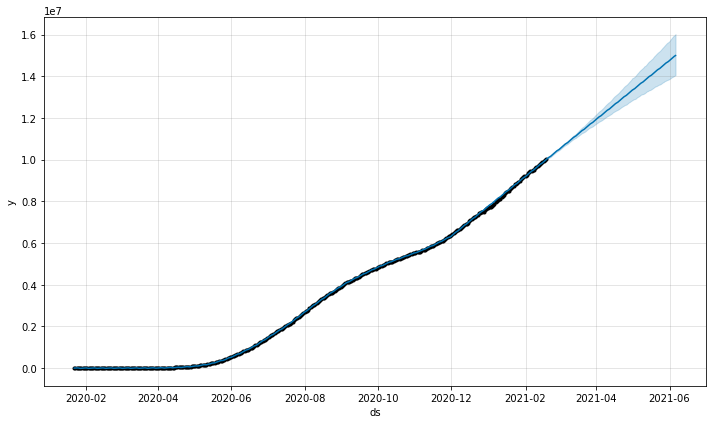

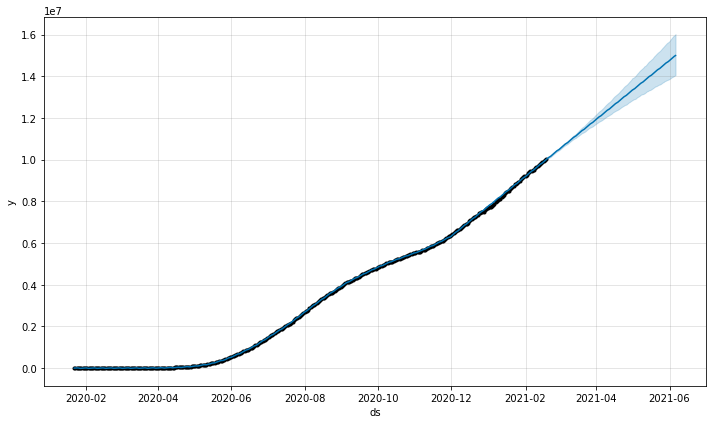

In [ ]:
modelo.plot(previsao)